# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata,study_results, how='outer', on="Mouse ID")
                       
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Checking the number of mice.
mice_num=mouse_study["Mouse ID"].value_counts()
print(mice_num)

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64


In [64]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup=mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']
print(mouse_dup)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
Mice_dup_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
Mice_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study[mouse_study['Mouse ID'].isin(mouse_dup)==False]

In [67]:
# Checking the number of mice in the clean DataFrame.
clean_data = clean_mouse["Mouse ID"].value_counts()
clean_data

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean = clean_mouse['Tumor Volume (mm3)'].groupby(clean_mouse['Drug Regimen']).mean()
median = clean_mouse['Tumor Volume (mm3)'].groupby(clean_mouse['Drug Regimen']).median()
var = clean_mouse['Tumor Volume (mm3)'].groupby(clean_mouse['Drug Regimen']).var()
std = clean_mouse['Tumor Volume (mm3)'].groupby(clean_mouse['Drug Regimen']).std()
sem = clean_mouse['Tumor Volume (mm3)'].groupby(clean_mouse['Drug Regimen']).sem()                                             
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stat = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std,"Tumor Volume Std. Err":sem}) 
# Assemble the resulting series into a single summary DataFrame.
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg = clean_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

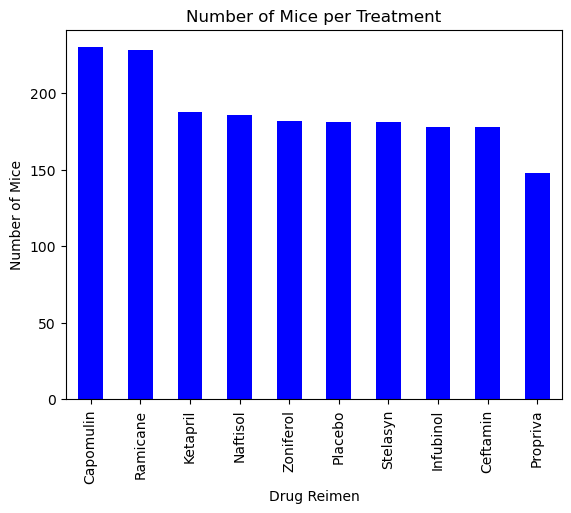

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_mice = clean_mouse["Drug Regimen"].value_counts()
plot_pand_mice = plot_mice.plot.bar(color='blue')
plt.xlabel("Drug Reimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

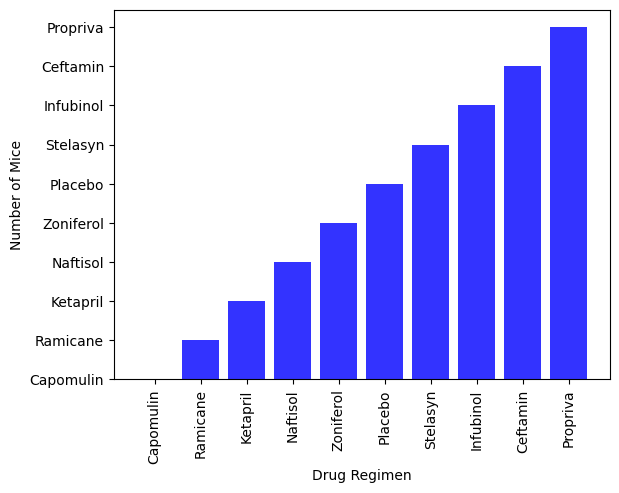

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = plot_mice.index.values
y_axis = plot_mice.values

plt.bar(x_axis, x_axis, color='blue', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


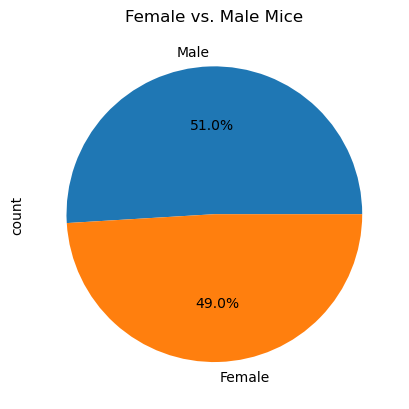

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_vs_male = clean_mouse["Sex"].value_counts()
plt.title("Female vs. Male Mice")
fem_vs_male.plot.pie(autopct="%1.1f%%")
plt.show()

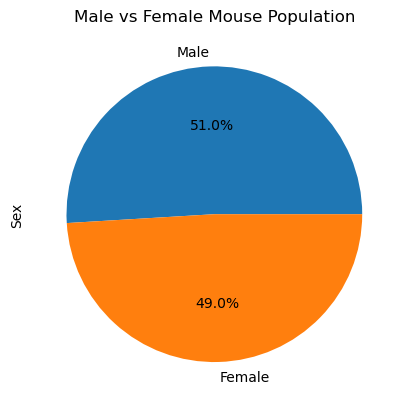

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables = ['Female','Male']
sizes = [49,51]
plot = fem_vs_male.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
regimens = mouse_study[mouse_study['Drug Regimen'].isin(regimens_list)]
# Start by getting the last (greatest) timepoint for each mouse
greatest_mouse = regimens.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_v = pd.merge(greatest_mouse, mouse_study, on = ['Mouse ID', 'Timepoint'],how="left")
tumor_v.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting)
treatment = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in treatment_list:
    
    # Locate the rows that contain mice on each drug and get the tumor volumes
    tumor_volumes = tumor_v.loc[tumor_v['Drug Regimen'] == treatments, 'Tumor Volume (mm3)']
    
    # add subset 
    treatment.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq + (1.5 * IQR)

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


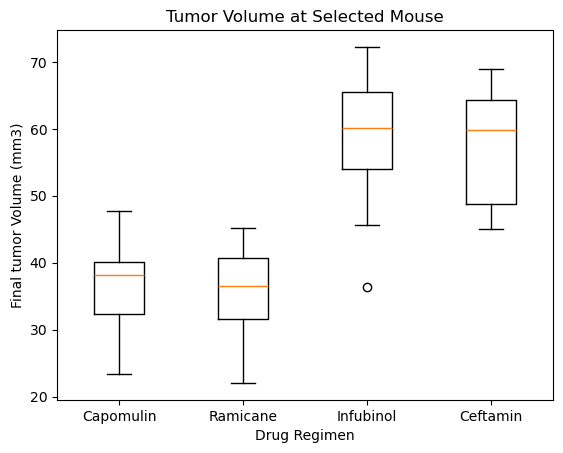

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = treatment
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

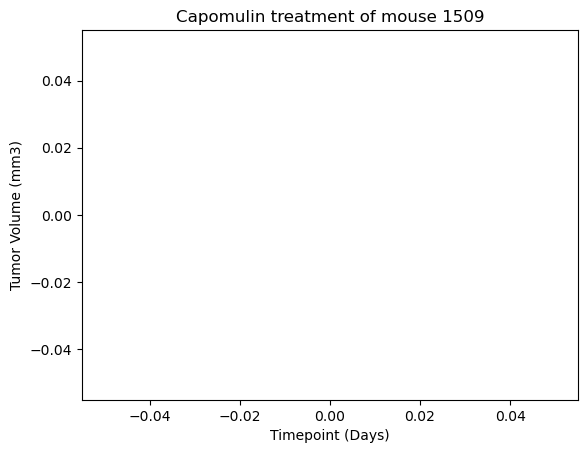

In [77]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = tumor_v.loc[tumor_v["Mouse ID"] =="1509"]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
fog1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse 1509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahrenheit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

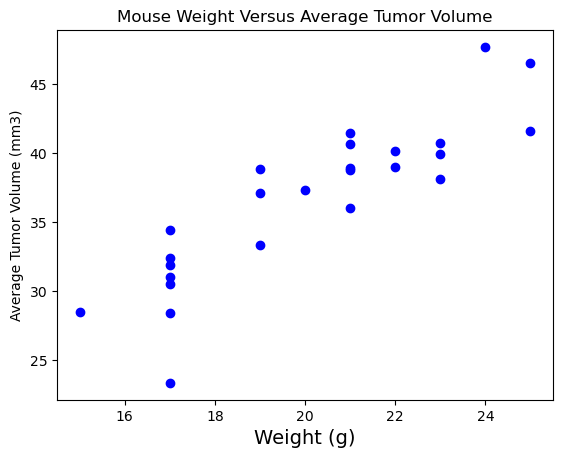

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_data = tumor_v[tumor_v['Drug Regimen'] == 'Capomulin']
average_tumor_volume = tumor_v.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
marker_size=15
plt.scatter(capomulin_data['Weight (g)'],capomulin_data['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88
The r-squared is: 0.769


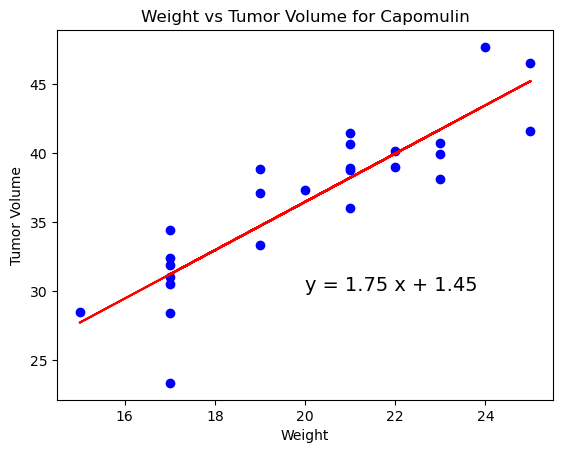

In [83]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capomulin_data['Weight (g)'],capomulin_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
regress_values=capomulin_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"],color='b')
plt.plot(capomulin_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,30), fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()